In [205]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, svm, metrics  
import math
from keras import metrics
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [163]:
train_v = '/Users/anyaozmen/Downloads/heart_warm/train_values.csv'

In [164]:
train_l = '/Users/anyaozmen/Downloads/heart_warm/train_labels.csv'

In [165]:
df_tval = pd.read_csv(train_v, index_col=0)
#df_tval

In [166]:
df_tlab = pd.read_csv(train_l, index_col=0)
#df_tlab

In [167]:
selected_features = ['age', 
                     'sex', 
                     'max_heart_rate_achieved',
                     'serum_cholesterol_mg_per_dl',
                     'oldpeak_eq_st_depression',
                     'exercise_induced_angina',
                     'resting_ekg_results',
                     'resting_blood_pressure']
t_val_subset = df_tval[selected_features]

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


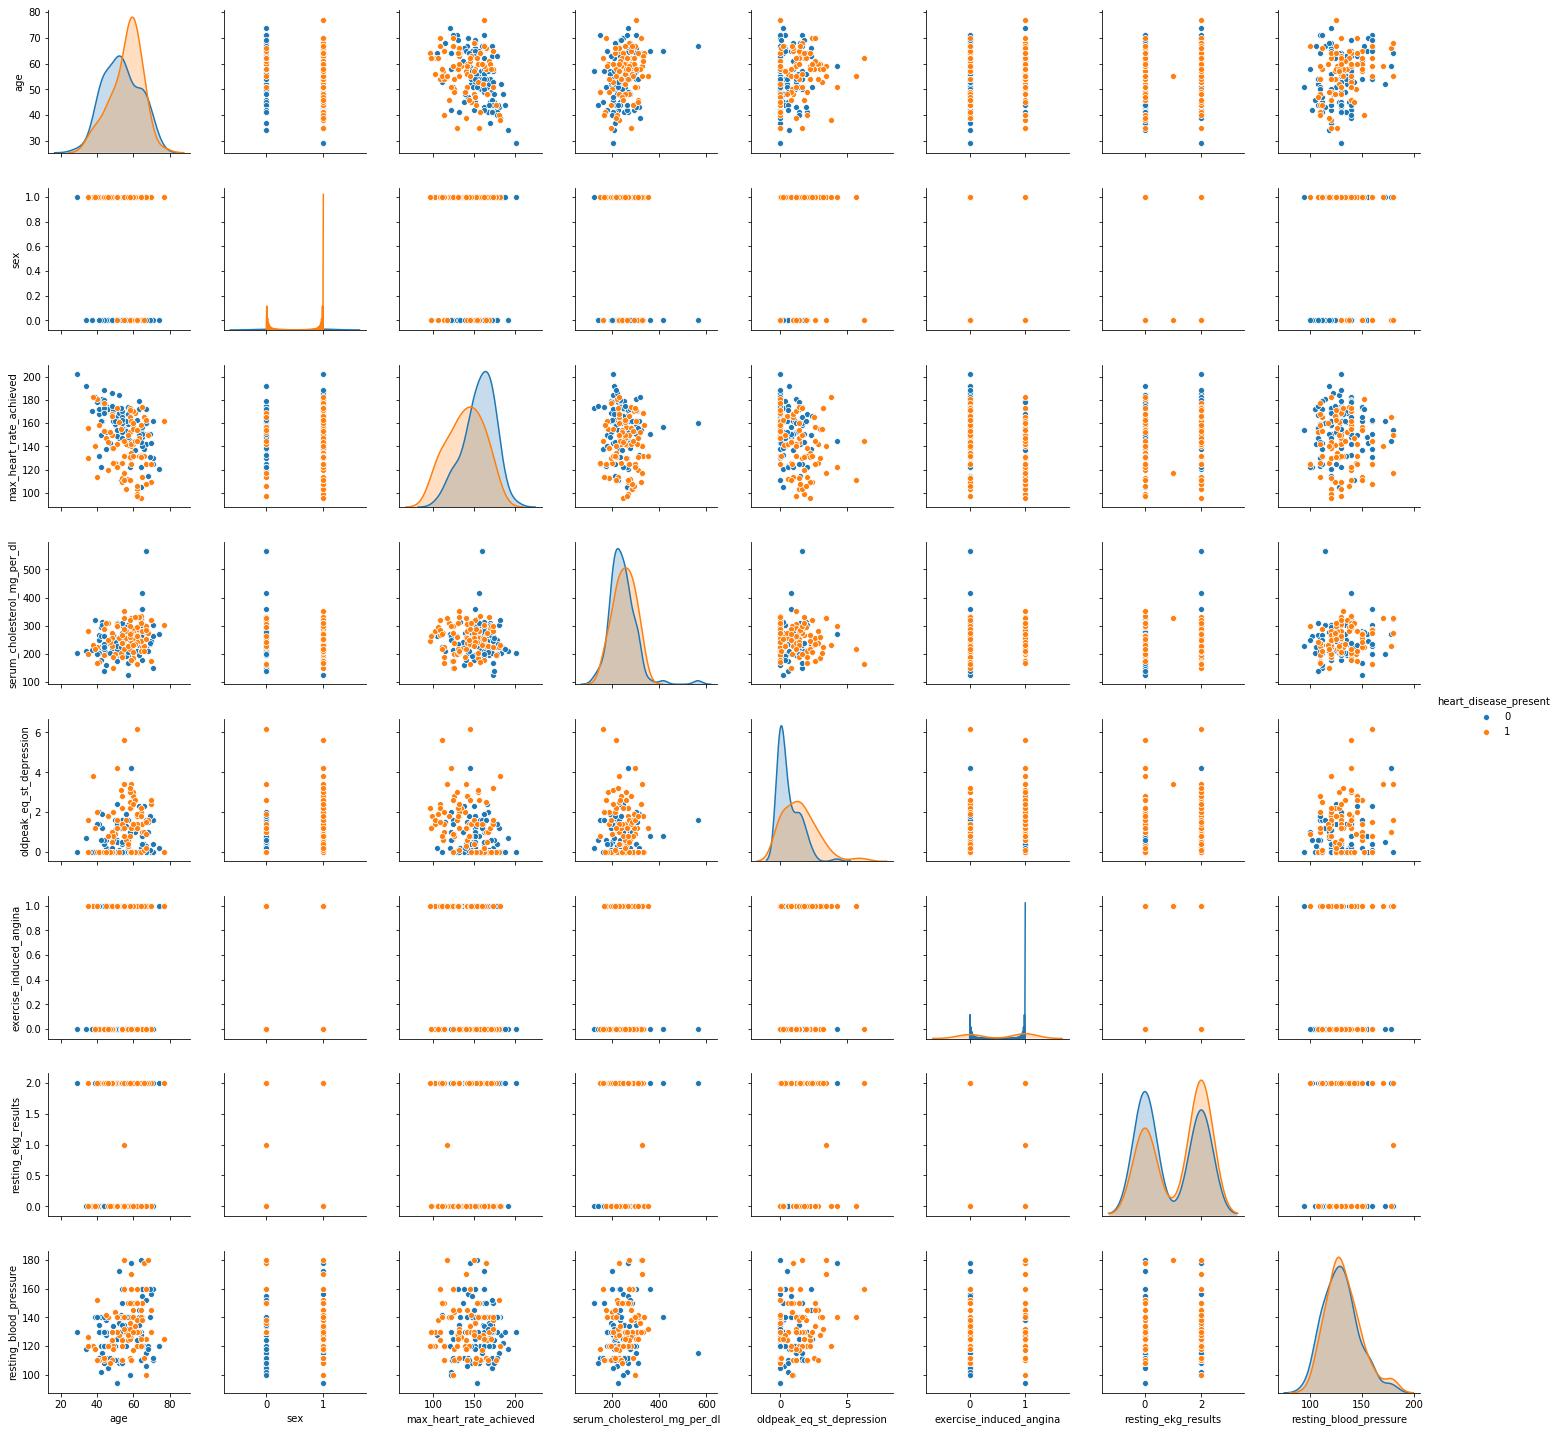

In [168]:
sns.pairplot(df_tval.join(df_tlab), 
             hue ='heart_disease_present', 
             vars=selected_features)

In [169]:
#replace the strings in thal column with corresponding numbers
df_tval = df_tval.replace({'normal': 2, 'reversible_defect': 1, 'fixed_defect': 0})

In [170]:
X = np.array(df_tval)
X = preprocessing.scale(X)

In [171]:
y = np.array(df_tlab)

In [175]:
X.shape

(180, 13)

In [176]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=13)

In [192]:
#def random_forest_classifier(features, target):
   #clf = RandomForestClassifier()
    #clf.fit(features, target)
   # return clf
clf = RandomForestRegressor(n_estimators = 3000, random_state = 10)
# Train the model on training data
clf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [193]:
# Use the forest's predict method on the test data
prediction_s = clf.predict(X_test)
# Calculate the absolute errors
errors_s = abs(prediction_s - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_s), 2), 'degrees.')

Mean Absolute Error: 0.44 degrees.


In [194]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors_s - y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 78.41 %.


In [195]:
sklearn.metrics.log_loss(y_test, prediction_s, normalize=True, sample_weight=None, labels=None)

0.46593290366828977

In [196]:
accuracy = clf.score(X_test, y_test) #test Accuracy squared error for linreg

In [197]:
print(accuracy)

0.09444214285714314


In [198]:
path = '/Users/anyaozmen/Downloads/Heart_warm/test_values.csv'
df_path = pd.read_csv(path, index_col = 0)
df_path = df_path.replace({'normal': 2, 'reversible_defect': 1, 'fixed_defect': 0})

In [199]:
test_val = np.array(df_path)
test_val = preprocessing.scale(test_val)

In [200]:
test_predictions = clf.predict(test_val)

In [201]:
test_predictions

array([0.26133333, 0.32533333, 0.94566667, 0.37566667, 0.93433333,
       0.00966667, 0.42733333, 0.677     , 0.40633333, 0.05566667,
       0.63766667, 0.60766667, 0.33433333, 0.95733333, 0.042     ,
       0.02366667, 0.24133333, 0.186     , 0.86366667, 0.00466667,
       0.993     , 0.20966667, 0.094     , 0.051     , 0.445     ,
       0.944     , 0.55433333, 0.18166667, 0.721     , 0.011     ,
       0.953     , 0.305     , 0.72      , 0.645     , 0.452     ,
       0.202     , 0.435     , 0.35233333, 0.261     , 0.11566667,
       0.96833333, 0.25566667, 0.976     , 0.09766667, 0.93066667,
       0.047     , 0.10033333, 0.59233333, 0.183     , 0.88633333,
       0.762     , 0.05      , 0.96866667, 0.06966667, 0.39066667,
       0.03133333, 0.74033333, 0.26433333, 0.15866667, 0.809     ,
       0.25966667, 0.93566667, 0.25633333, 0.95      , 0.097     ,
       0.79566667, 0.76766667, 0.418     , 0.92766667, 0.67766667,
       0.08633333, 0.99366667, 0.98633333, 0.89133333, 0.98333

In [202]:
save_file = pd.DataFrame(test_predictions, columns=['heart_disease_present'])
save_file.index.names = ['patient_id']

In [203]:
#test_predictions
file = pd.read_csv( '/Users/anyaozmen/Downloads/submission_format.csv')
file= file.drop(columns = ['heart_disease_present'])

In [204]:
save_file = pd.DataFrame(test_predictions, columns=['heart_disease_present'])
#result = pd.merge(file, save_file, left_index=True, right_index=True, how='right');
results = pd.concat([file, save_file], axis=1)
results = results.set_index(keys='patient_id')
results

,heart_disease_present
patient_id,
olalu7,0.261333
z9n6mx,0.325333
5k4413,0.945667
mrg7q5,0.375667
uki4do,0.934333
kev1sk,0.009667
9n6let,0.427333
jxmtyg,0.677000
51s2ff,0.406333


In [191]:
results.to_csv('/Users/anyaozmen/Desktop/heart_predictions_4.csv')